In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os,sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import time
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load the dataset
parkinsons_data = pd.read_csv("parkinsons.csv")

In [3]:
parkinsons_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_row",None)

In [5]:
parkinsons_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
#find null values in the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

AxesSubplot(0.125,0.11;0.775x0.77)


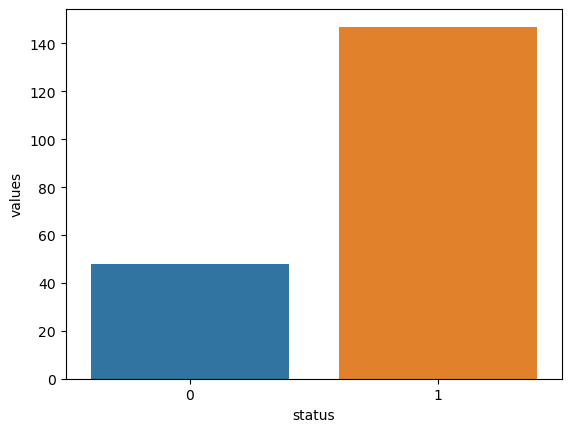

In [7]:
#check label imbalance
temp = parkinsons_data["status"].value_counts()
temp_parkinsons_data = pd.DataFrame({'status':temp.index,'values':temp.values})
print(sns.barplot(x='status',y='values',data=temp_parkinsons_data))

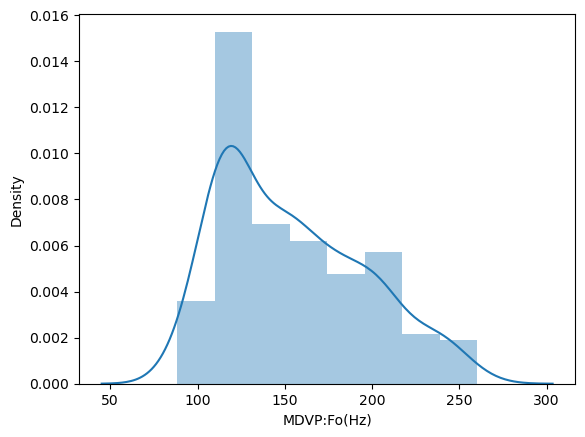

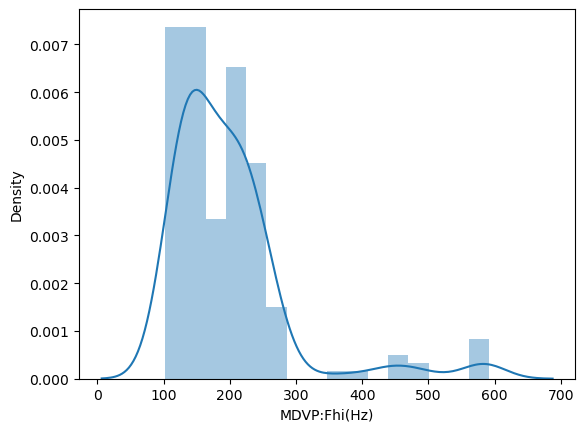

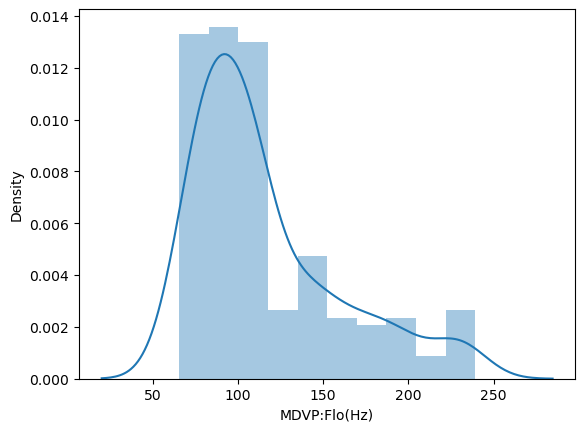

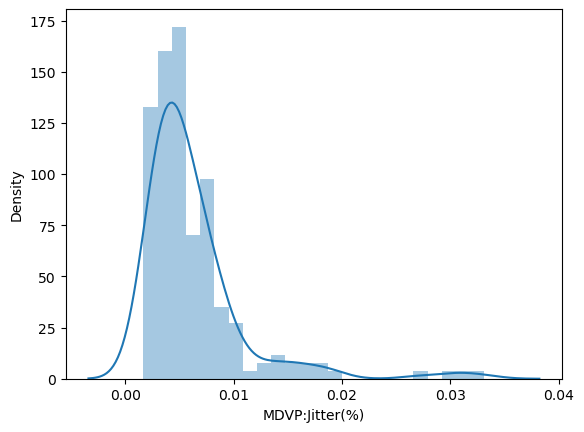

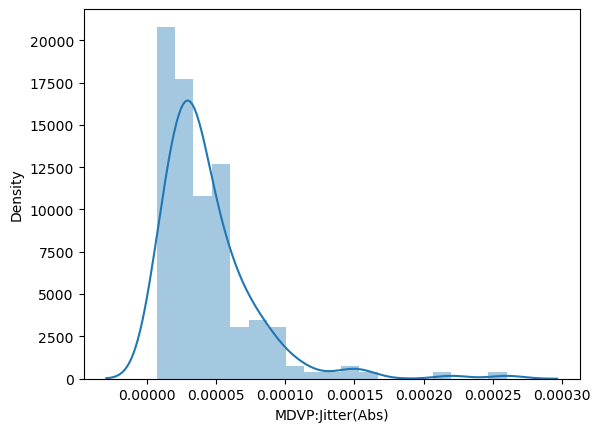

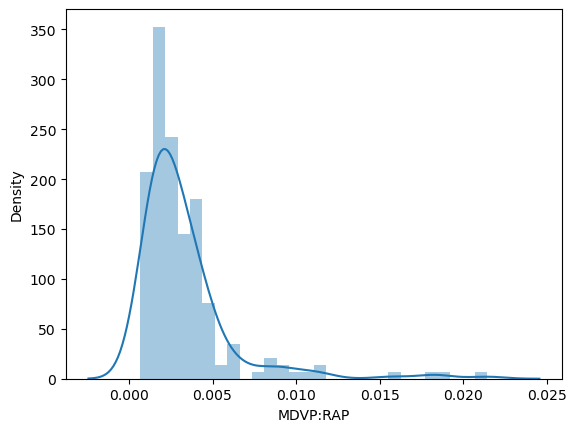

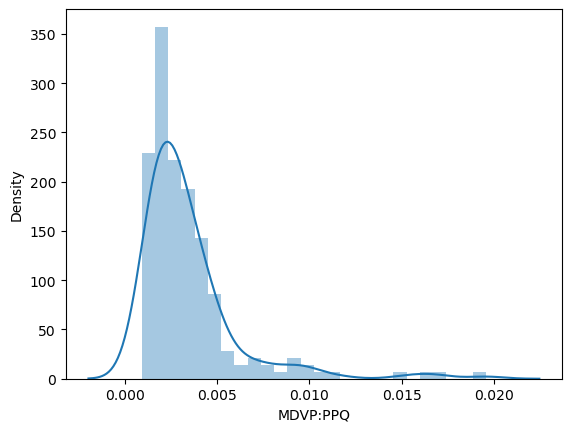

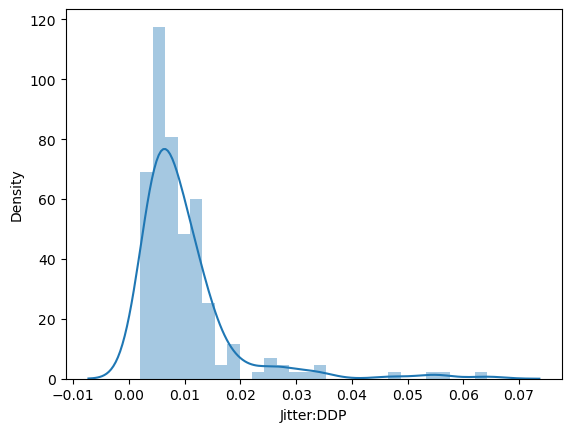

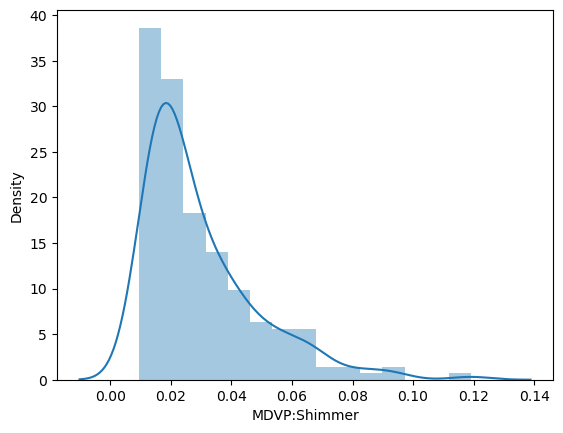

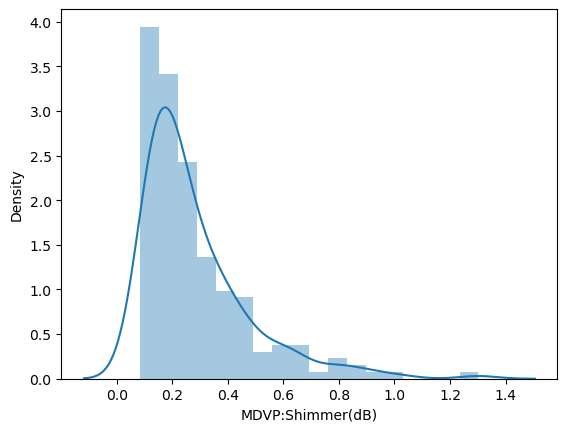

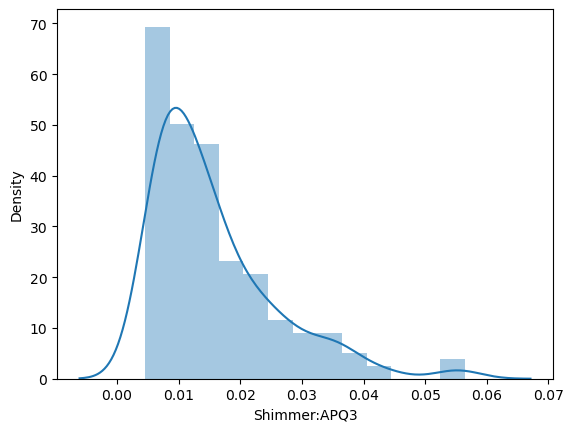

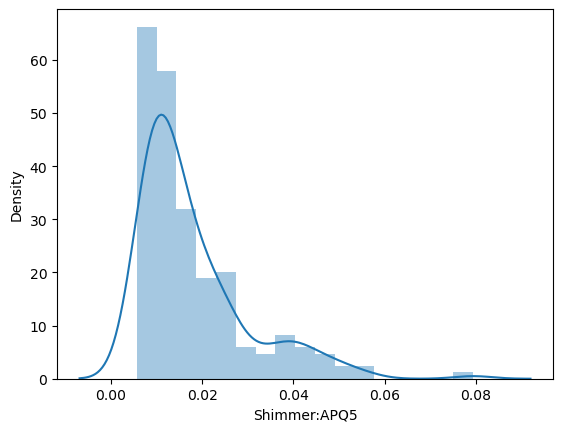

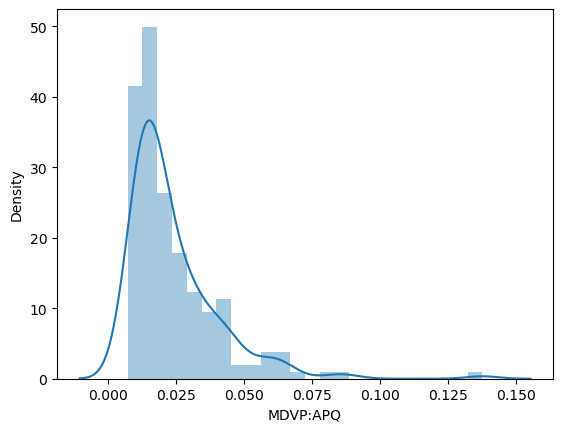

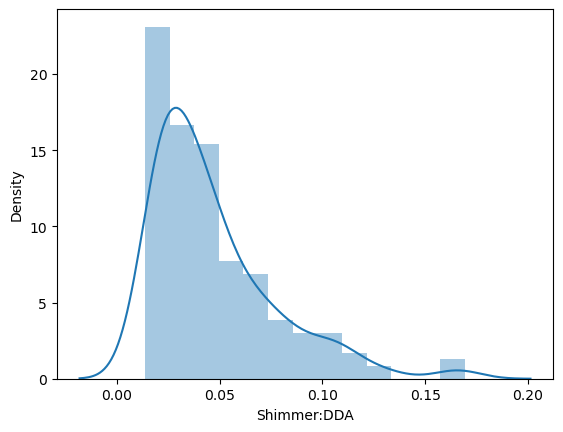

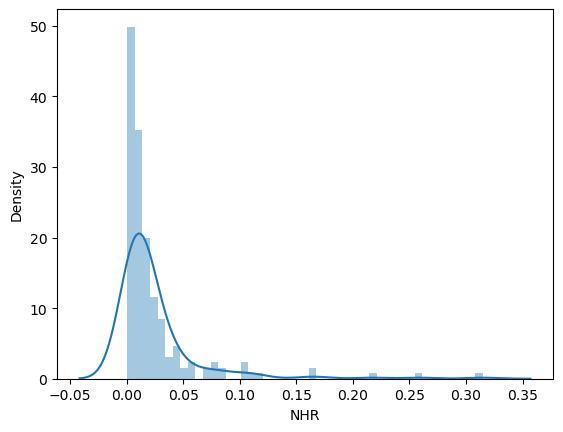

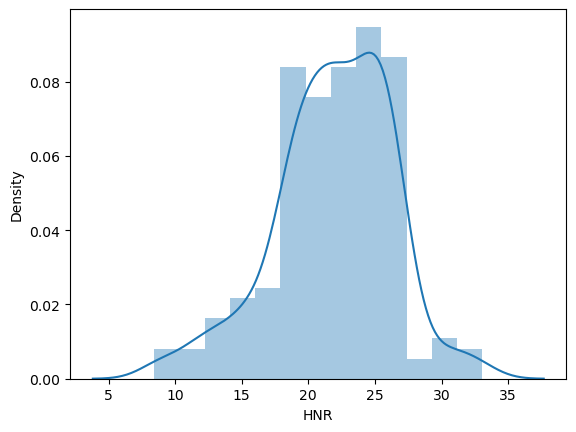

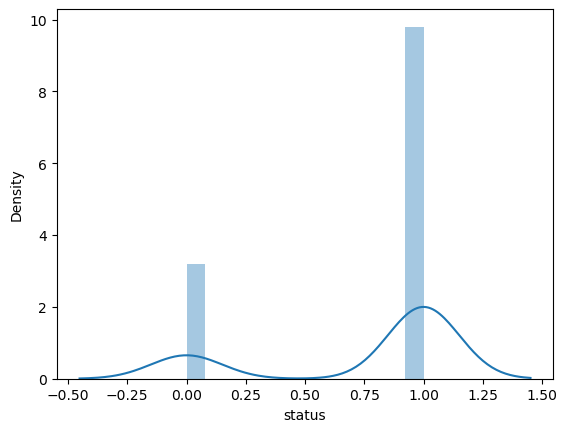

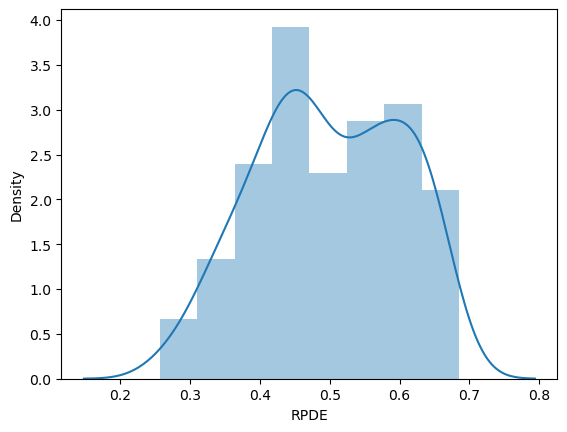

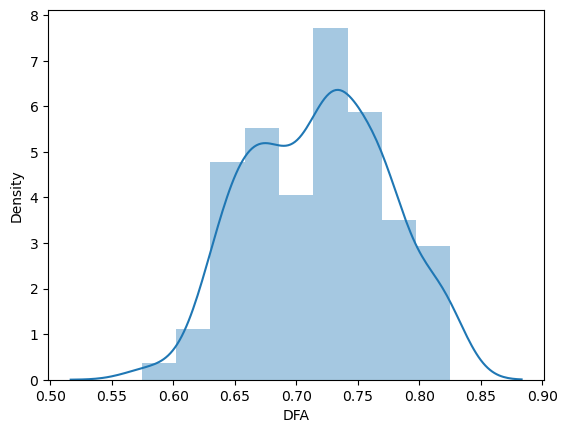

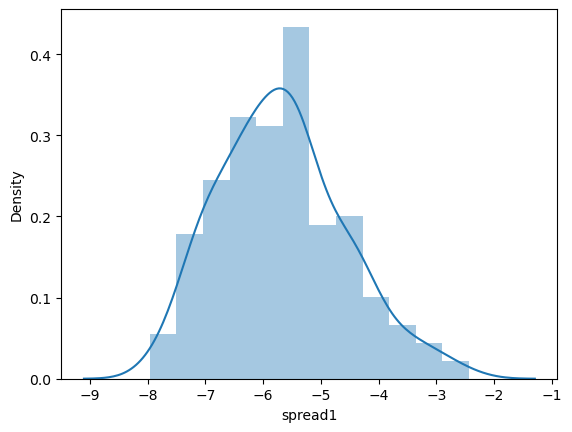

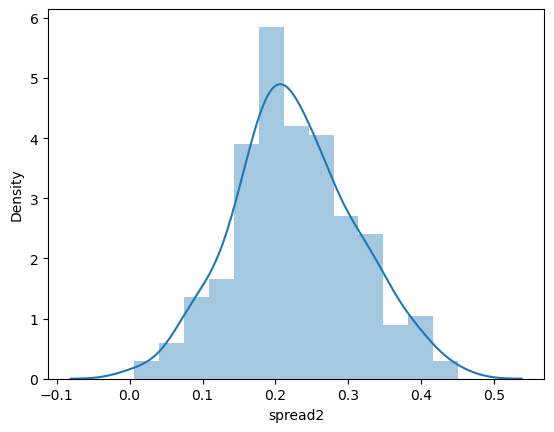

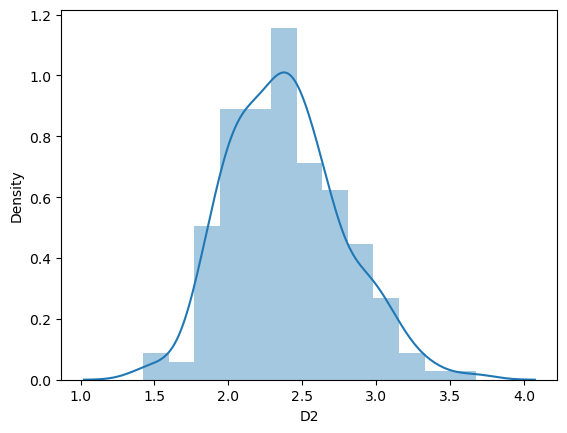

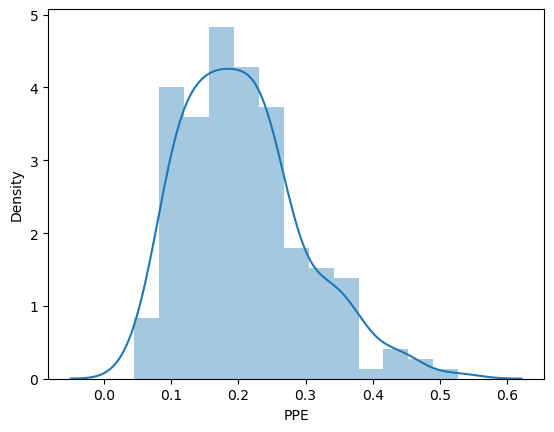

In [8]:
#find the distribution of data
def distplots(col):
    sns.distplot(parkinsons_data[col])
    plt.show()
for i in list(parkinsons_data.columns)[1:]:
    distplots(i)

In [9]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
parkinsons_data.shape

(195, 24)

In [11]:
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

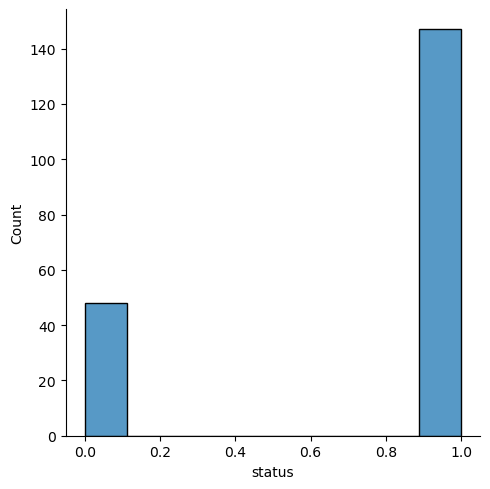

In [12]:
#Univariate distribution using distplot
sns.displot(parkinsons_data["status"])

<AxesSubplot: >

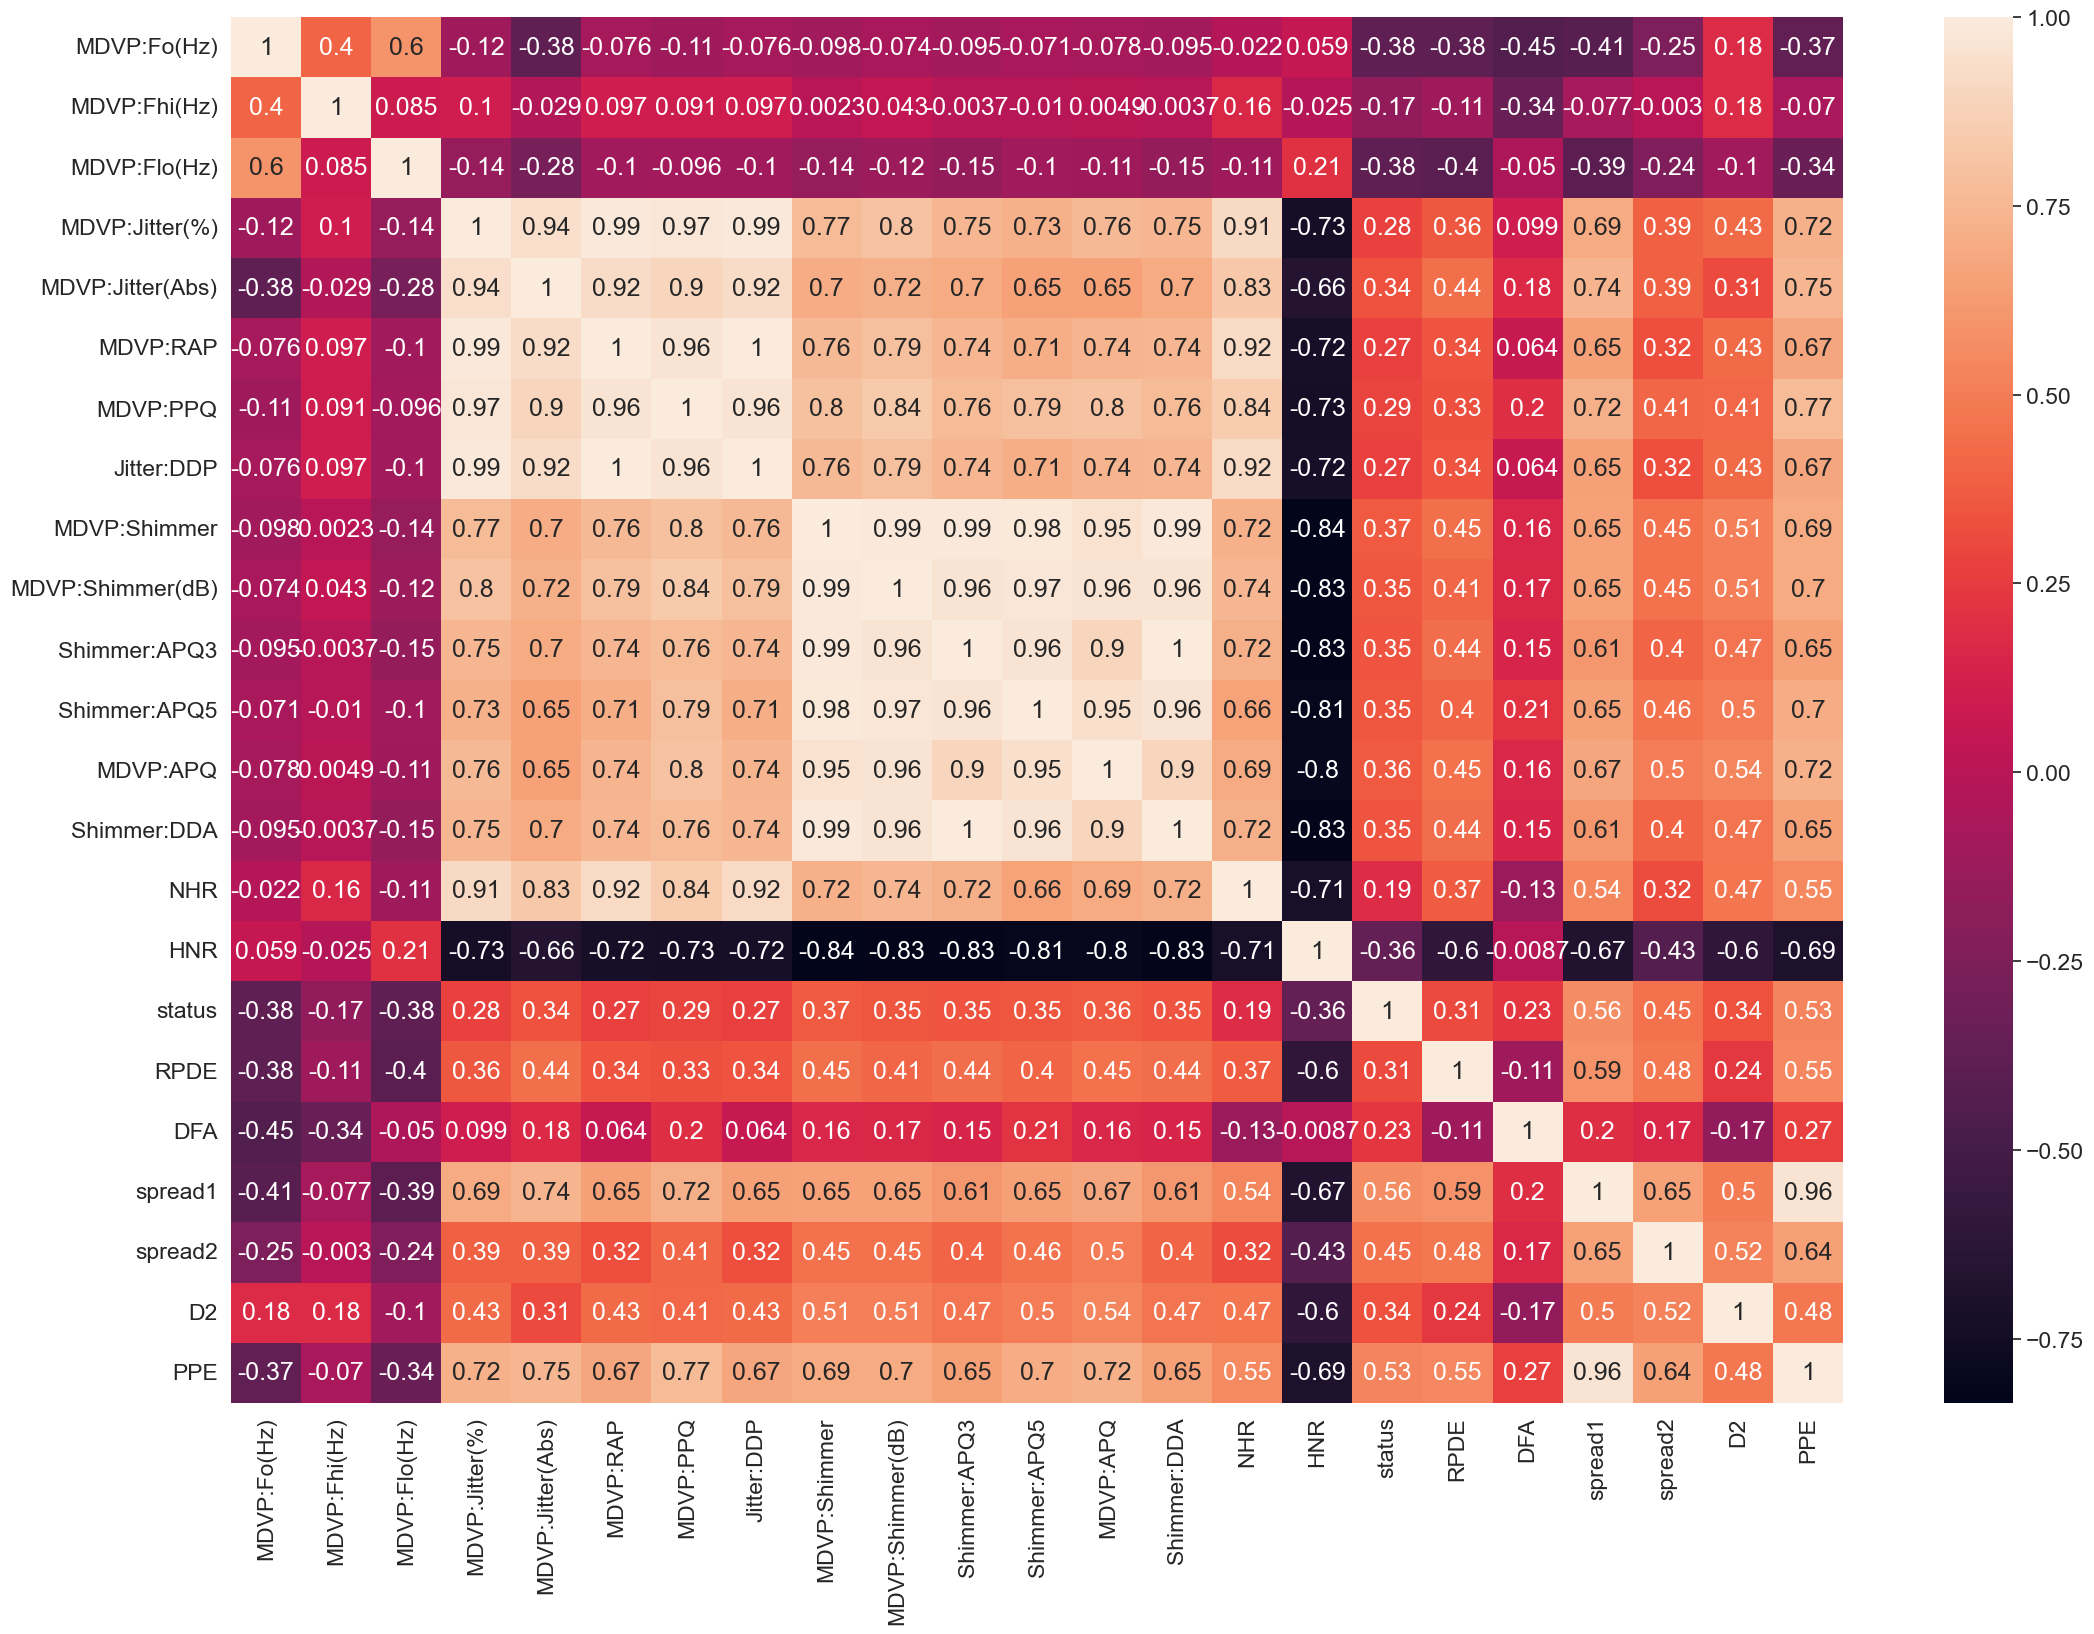

In [13]:
plt.figure(figsize=(26,18))
sns.set(font_scale=1.5)
sns.heatmap(parkinsons_data.corr(),annot=True)

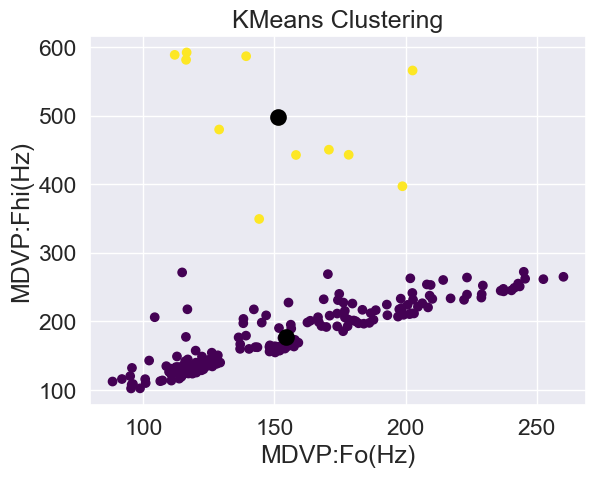

In [14]:
X = parkinsons_data.iloc[:, 1:-2]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
parkinsons_data['cluster'] = kmeans.labels_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, linewidths=2, color='black', zorder=10)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('KMeans Clustering')
plt.show()

In [15]:
parkinsons_data.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,cluster
status,,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017,0.062500
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828,0.061224


In [16]:
parkinsons_data.filter(['MDVP:Fhi(Hz)','MDVP:Flo(Hz)'])

,MDVP:Fhi(Hz),MDVP:Flo(Hz)
0,157.302,74.997
1,148.650,113.819
2,131.111,111.555
3,137.871,111.366
4,141.781,110.655
5,131.162,113.787
6,137.244,114.820
7,113.840,104.315
8,132.068,91.754
9,120.103,91.226


In [17]:
x = parkinsons_data.drop(columns=["name","status"],axis=1)
y = parkinsons_data["status"]

In [18]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14       152.845       163.305        75

In [19]:
print(y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     1
37     1
38     1
39     1
40     1
41     1
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     1
56     1
57     1
58     1
59     1
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
print(x.shape, x_train.shape, x_test.shape)

(195, 23) (156, 23) (39, 23)


In [22]:
start_time=time.time()
ss = StandardScaler()

In [23]:
ss.fit(x_train)

StandardScaler()

In [24]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
end_time=time.time()
data_scaling_time=end_time-start_time

In [25]:
print(x_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.55160318  0.07769494
  -0.26171196]
 [-1.05512719 -0.83337041 -0.9284778  ... -0.61014073  0.39291782
  -0.26171196]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.62849605 -0.50948408
  -0.26171196]
 ...
 [-0.9096785  -0.6637302  -0.160638   ... -0.47404629 -0.2159482
  -0.26171196]
 [-0.35977689  0.19731822 -0.79063679 ... -0.47272835  0.28181221
  -0.26171196]
 [ 1.01957066  0.19922317 -0.61914972 ...  1.23632066 -0.05829386
  -0.26171196]]


In [26]:
print(x_test)

[[-1.27434768e+00 -7.92100902e-01 -6.42064804e-01 -3.70550081e-02
   7.65593976e-01 -5.36663194e-02  2.70521702e-01 -5.17113412e-02
  -1.73362776e-01 -1.84537779e-01 -2.46162360e-01 -9.53432617e-02
   3.51764171e-02 -2.46253875e-01 -2.42578071e-01 -5.71526263e-01
   1.17904437e+00  1.05108661e+00  5.45105104e-01  2.12053870e+00
   2.20220746e-01  6.73407367e-01 -2.32495277e-01]
 [-9.93036290e-01 -7.55457877e-01 -6.02839911e-01  2.21517439e+00
   2.37519856e+00  2.52231701e+00  1.86180632e+00  2.52056878e+00
   6.63120841e-01  1.31330947e+00  8.25344625e-01  4.41243374e-01
   3.16150237e-01  8.25821477e-01  7.63822230e-01 -1.17294582e+00
   9.93607948e-01  1.27956439e+00  9.15137942e-01  4.60066283e-01
   1.91967718e-01  1.05151668e+00 -2.32495277e-01]
 [-9.59040068e-01 -4.67857304e-01 -5.93333267e-01  1.66162458e+00
   1.97279742e+00  1.61932286e+00  1.11791311e+00  1.62190467e+00
   4.00543673e-01  5.00453343e-01  5.25816736e-01  1.61390934e-01
   2.41072212e-01  5.25249223e-01  2.350

In [27]:
print(data_scaling_time)

0.2459583282470703


In [28]:
start_time=time.time()
model_svm = SVC(cache_size=100)
svm = model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred)
end_time=time.time()
model_training_time=end_time-start_time

In [29]:
print(accuracy_svc)

0.8717948717948718


In [30]:
print(model_training_time)

0.08828449249267578


In [31]:
start_time=time.time()
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)
end_time=time.time()
model_training_time=end_time-start_time

In [32]:
print(accuracy_LR)

0.7948717948717948


In [33]:
print(model_training_time)

0.3589773178100586


In [34]:
start_time=time.time()
classifier = DecisionTreeClassifier(random_state=14)
dt=classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_DT = accuracy_score(y_test,y_pred)
end_time=time.time()
model_training_time=end_time-start_time

In [35]:
print(accuracy_DT)

0.7692307692307693


In [36]:
print(model_training_time)

0.15595173835754395


In [37]:
start_time=time.time()
classifier = RandomForestClassifier(random_state=14)
rfi=classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_RfI = accuracy_score(y_test,y_pred)
end_time=time.time()
model_training_time=end_time-start_time

In [38]:
print(accuracy_RfI)

0.8974358974358975


In [39]:
print(model_training_time)

0.3019979000091553


In [23]:
start_time=time.time()
classifier = RandomForestClassifier(criterion='entropy')
rfe=classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_RFE = accuracy_score(y_test,y_pred)
end_time=time.time()
model_training_time=end_time-start_time

# save the model 
import pickle
pickle.dump(rfe, open('model.pkl','wb'))
# load the model
model = pickle.load(open('model.pkl','rb'))  

    

In [ ]:
print(accuracy_RFE)

0.8717948717948718


In [ ]:
print(model_training_time)

0.2968933582305908


In [ ]:
list1 = ['Logistic Regression','Decision Tree','Random Forest(Information Gain)','Random Forest(Entropy)','SVM']
list2 = [accuracy_LR,accuracy_DT,accuracy_RfI,accuracy_RFE,accuracy_svc]
list3 = [classifier,classifier,classifier,classifier,model_svm]
parkinsons_data_accuracy = pd.DataFrame({'Method Used': list1,'Accuracy': list2})

In [ ]:
print(parkinsons_data_accuracy)

                       Method Used  Accuracy
0              Logistic Regression  0.794872
1                    Decision Tree  0.769231
2  Random Forest(Information Gain)  0.897436
3           Random Forest(Entropy)  0.871795
4                              SVM  0.871795


Axes(0.125,0.11;0.775x0.77)


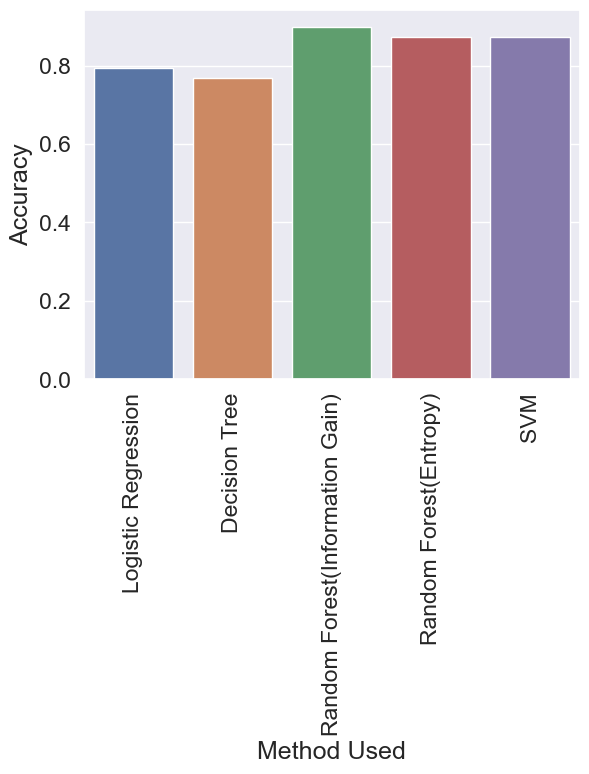

In [ ]:
chart=sns.barplot(x='Method Used',y='Accuracy',data=parkinsons_data_accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model
model = joblib.load('model.pkl')

# Create the StandardScaler object
ss = StandardScaler()

# Input data
input_data = (173.917, 192.735, 86.18, 0.00476, 0.00003, 0.00221, 0.00258, 0.00663, 0.04192, 0.364, 0.02187, 0.0247, 0.03772, 0.06562, 0.0184, 20.422, 0.537264, 0.686894, -5.248776, 0.210279, 2.547508, 0.253556, 0.0)
# Convert input data to NumPy array and reshape
input_data_np = np.asarray(input_data)
input_data_re = input_data_np.reshape(1, -1)

# Standardize the input data
s_data = ss.fit_transform(input_data_re)

# Predict using the trained model
pred = model.predict(s_data)

# Print the prediction
if pred[0] == 0:
    print("Negative: No Parkinson's disease detected.")
else:
    print("Positive: Parkinson's disease detected.")

Positive: Parkinson's disease detected.
